## Introduction to GPS Tracking of Birds

In [1]:
import pandas as pd
birddata=pd.read_csv("bird_tracking.csv")
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [2]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


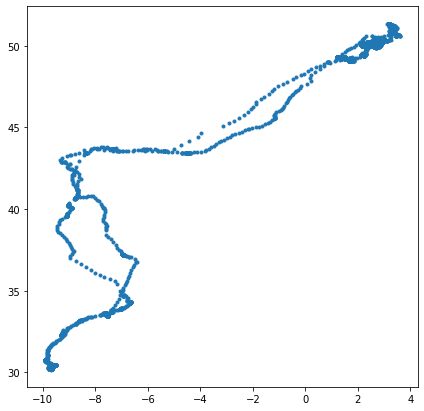

In [3]:
import matplotlib.pyplot as plt
import numpy as np

ix = birddata.bird_name=="Eric"
x,y=birddata.longitude[ix],birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

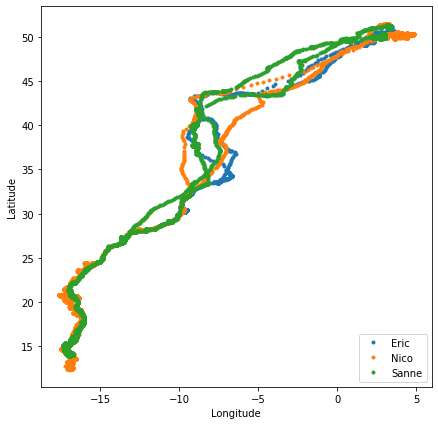

In [4]:
bird_names= pd.unique(birddata.bird_name)
plt.figure(figsize=(7,7))
for bird_name in bird_names:
	ix = birddata.bird_name==bird_name
	x,y=birddata.longitude[ix],birddata.latitude[ix]
	plt.plot(x,y,".",label=bird_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

## Examining Flight Speed

Text(0, 0.5, 'Frequency')

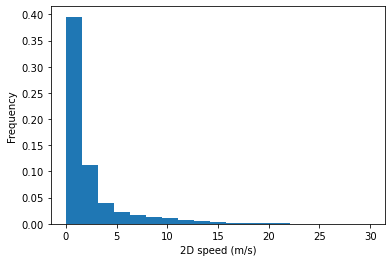

In [6]:
ix = birddata.bird_name=="Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed,bins=np.linspace(0,30,20),density=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")

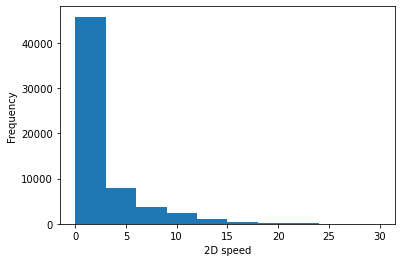

In [7]:
birddata.speed_2d.plot(kind="hist",range=[0,30])
plt.xlabel("2D speed")
plt.savefig("pd_hist.pdf")

## Using Datetime

In [8]:
birddata.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [9]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [10]:
import datetime
datetime.datetime.today()

datetime.datetime(2022, 4, 17, 9, 30, 7, 999445)

In [13]:
time_1=datetime.datetime.today()


time_2=datetime.datetime.today()

time_2-time_1

datetime.timedelta(microseconds=128)

In [14]:
time_2=datetime.datetime.today()
time_2-time_1

datetime.timedelta(seconds=71, microseconds=786357)

In [15]:
date_str=birddata.date_time[0]
type(date_str)


str

In [16]:
date_str

'2013-08-15 00:18:08+00'

In [17]:
date_str[:-3]


'2013-08-15 00:18:08'

In [18]:
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [21]:
timestamps = []
for k in range(len(birddata)):
	timestamps.append(datetime.datetime.strptime\
		(birddata.date_time.iloc[k][:-3],"%Y-%m-%d %H:%M:%S"))

timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [22]:
birddata.index

RangeIndex(start=0, stop=61920, step=1)

In [23]:
birddata["timestamp"]=pd.Series(timestamps,index=birddata.index)

In [24]:
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [25]:
birddata.timestamp[4]-birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [32]:
data = birddata[birddata.bird_name=="Eric"]
times=birddata.timestamp[birddata.bird_name=="Eric"]
elapsed_time = [time - times[0] for time in times]
elapsed_days=np.array(elapsed_time)/datetime.timedelta(days=1)

In [27]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [28]:
elapsed_time[1000]/datetime.timedelta(days=1)

12.084722222222222

In [29]:
elapsed_time[1000]/datetime.timedelta(hours=1)


290.03333333333336

Text(0, 0.5, 'Elapsed time (days)')

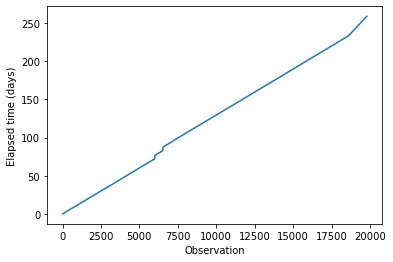

In [30]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")

## Calculating Daily Mean Speed


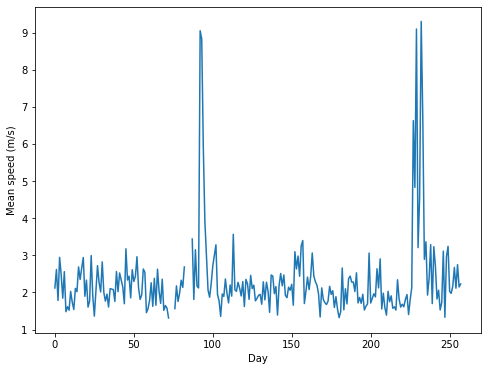

In [34]:
next_day = 1
inds = []
daily_mean_speed= []
for (i,t) in enumerate(elapsed_days):
	if t < next_day:
		inds.append(i)
	else:
		#compute mean speed
		daily_mean_speed.append(np.mean(data.speed_2d[inds]))
		next_day +=1
		inds=[]

plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.savefig("dms.pdf")

In [36]:
data_Sanne = birddata[birddata.bird_name=="Sanne"]
data_Sanne

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
40916,40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne,2013-08-15 00:01:08
40917,40917,54,2013-08-15 00:31:00+00,833,-141.804053,49.931076,2.281900,1.318484,Sanne,2013-08-15 00:31:00
40918,40918,55,2013-08-15 01:01:19+00,833,-10.651840,49.931016,2.281933,0.076158,Sanne,2013-08-15 01:01:19
40919,40919,56,2013-08-15 01:31:38+00,833,14.727689,49.931053,2.281911,0.014142,Sanne,2013-08-15 01:31:38
40920,40920,55,2013-08-15 02:01:24+00,833,-169.882200,49.931042,2.281893,0.094340,Sanne,2013-08-15 02:01:24
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


## Using the Cartopy Library

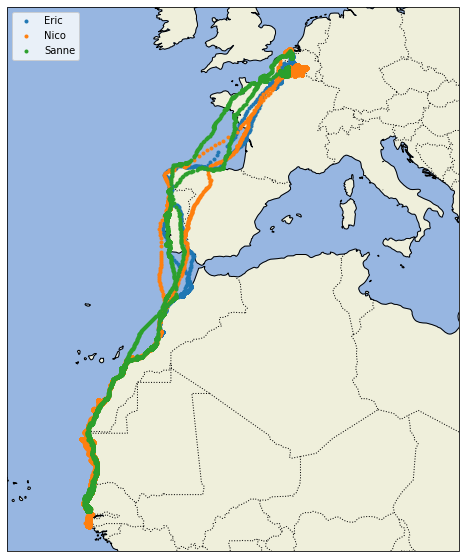

In [40]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0,20.0,52.0,10))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS,linestyle=":")

for name in bird_names:
	ix = birddata["bird_name"]==name
	x,y = birddata.longitude[ix], birddata.latitude[ix]
	ax.plot(x,y,".",transform=ccrs.Geodetic(),label=name)

plt.legend(loc="upper left")
plt.savefig("map.pdf")